In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
filenames = ["monsters/mon1.json",
             "monsters/mon2.json",
             "monsters/mon3.json",
             "monsters/mon4.json",
             "monsters/mon5.json",
             "monsters/mon6.json",
             "monsters/mon7.json",
             "monsters/mon8.json",
             "monsters/mon9.json",
             "monsters/mon10.json",
             "monsters/mon11.json",
             "monsters/mon12.json",
             "monsters/mon13.json",
             "monsters/mon14.json",
             "monsters/mon15.json",
             "monsters/mon16.json",
             "monsters/mon17.json",
             "monsters/mon18.json",
             "monsters/mon19.json",
             "monsters/mon20.json",
             "monsters/mon21.json",
             "monsters/mon22.json"]


In [4]:
monsters = []
for f in filenames:
    monsters.append(pd.read_json(f))

mon = pd.DataFrame()

mon = mon.append(monsters)

mon = mon['results'].apply(pd.Series)

In [5]:
pd.options.display.max_columns = None
mon.head(10)

,slug,name,size,type,subtype,group,alignment,armor_class,armor_desc,hit_points,hit_dice,speed,strength,dexterity,constitution,intelligence,wisdom,charisma,strength_save,dexterity_save,constitution_save,intelligence_save,wisdom_save,charisma_save,perception,skills,damage_vulnerabilities,damage_resistances,damage_immunities,condition_immunities,senses,languages,challenge_rating,actions,reactions,legendary_desc,legendary_actions,special_abilities,spell_list,img_main,document__slug,document__title,document__license_url
0,aatxe,Aatxe,Large,celestial,shapechanger,None,lawful good,14,natural armor,105,10d10+50,{'walk': 50},22,12,20,10,14,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'athletics': 9, 'intimidation': 5}",,,,"charmed, frightened",passive Perception 12,understands all but can't speak,5,"[{'attack_bonus': 9, 'damage_dice': '3d8+6', '...",,"The aatxe can take 3 legendary actions, choosi...",[{'desc': 'The aatxe makes a Wisdom (Perceptio...,[{'desc': 'If the aatxe moves at least 20 feet...,[],None,cc,Creature Codex OGL,http://open5e.com/legal
1,aboleth,Aboleth,Large,aberration,,None,lawful evil,17,natural armor,135,18d10+36,"{'walk': 10, 'swim': 40}",21,9,15,18,15,18,NaN,NaN,6.0,8.0,6.0,NaN,10.0,"{'history': 12, 'perception': 10}",,,,,"darkvision 120 ft., passive Perception 20","Deep Speech, telepathy 120 ft.",10,"[{'name': 'Multiattack', 'desc': 'The aboleth ...",,"The aboleth can take 3 legendary actions, choo...","[{'name': 'Detect', 'desc': 'The aboleth makes...","[{'name': 'Amphibious', 'desc': 'The aboleth c...",[],http://api.open5e.com/static/img/monsters/abol...,wotc-srd,Systems Reference Document,http://open5e.com/legal
2,aboleth-nihilith,"Aboleth, Nihilith",Large,undead,,None,chaotic evil,17,natural armor,135,18d10+36,"{'hover': True, 'walk': 10, 'swim': 40, 'fly':...",21,9,15,18,15,18,NaN,NaN,6.0,8.0,6.0,NaN,10.0,"{'history': 12, 'perception': 10}",,"acid, fire, lightning, thunder (only when in e...","cold, necrotic, poison; bludgeoning, piercing ...","charmed, exhaustion, frightened, grappled, par...","darkvision 120 ft., passive Perception 20","Void Speech, telepathy 120 ft.",12,"[{'name': 'Multiattack', 'desc': 'The nihileth...","[{'name': 'Void Body', 'desc': 'The nihileth c...","A nihileth can take 3 legendary actions, choos...","[{'name': 'Detect', 'desc': 'The aboleth makes...","[{'name': 'Undead Fortitude', 'desc': 'If dama...",[],None,tob,Tome of Beasts OGL,http://open5e.com/legal
3,abominable-beauty,Abominable Beauty,Medium,fey,,None,neutral evil,18,natural armor,187,22d8+88,{'walk': 30},17,18,18,17,16,26,NaN,8.0,8.0,NaN,NaN,12.0,7.0,"{'deception': 12, 'perception': 7, 'performanc...",,,fire,,passive Perception $1,"Common, Draconic, Elven, Sylvan",11,"[{'name': 'Multiattack', 'desc': 'The abominab...",,,,"[{'name': 'Burning Touch', 'desc': 'The abomin...",[],None,tob,Tome of Beasts OGL,http://open5e.com/legal
4,accursed-defiler,Accursed Defiler,Medium,undead,,None,neutral evil,12,,75,10d8+30,{'walk': 30},19,14,17,6,15,14,NaN,NaN,NaN,NaN,NaN,NaN,4.0,"{'perception': 4, 'stealth': 4}",,"necrotic; bludgeoning, piercing, and slashing ...",poison,"charmed, exhaustion, frightened, poisoned","darkvision 60 ft., passive Perception 14","understands an ancient language, but can't speak",4,"[{'name': 'Multiattack', 'desc': 'The accursed...",,,,"[{'name': 'Cursed Existence', 'desc': 'When it...",[],None,tob,Tome of Beasts OGL,http://open5e.com/legal
5,acid-ant,Acid Ant,Small,monstrosity,,None,unaligned,13,natural armor,13,3d6+3,{'walk': 30},8,13,12,1,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},,,acid,,"blindsight 60 ft., passive Perception 8",-,1/4,"[{'attack_bonus': 3, 'damage_dice': '2d4', 'de...",,,,"[{'desc': 'When the ant is reduced to 0 hp, it...",[],None,cc,Creature Codex OGL,http://open5e.com/legal
6,acolyte,Acolyte,Medium,humanoid,any race,None,any alignment,10,None,9,2d8,{'walk': 30},10,10,10,10,14,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'medicine': 4, 'religion': 2}",,,,,passive Perception 12,any one language (usually Common),1/4,"[{'

In [26]:
len(mon.iloc[5]['special_abilities'])

2

In [8]:
len(mon.iloc[0]['spell_list'])

0

In [9]:
mon['num_spells'] = mon['spell_list'].apply(lambda x: len(x))

In [13]:
mon['num_spells'].head(50)

0     0
1     0
2     0
3     0
4     0
5     0
6     6
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: num_spells, dtype: int64

In [42]:
mon['num_actions'] = mon['actions'].apply(lambda x: len(x))

In [43]:
mon['num_reactions'] = mon['reactions'].apply(lambda x: len(x))

In [44]:
mon['num_legendary_actions'] = mon['legendary_actions'].apply(lambda x: len(x))

In [45]:
mon['num_special_abilities'] = mon['special_abilities'].apply(lambda x: len(x))

In [46]:
mon1 = mon.drop(['slug', 'subtype','group', 'armor_desc', 'hit_dice', 'speed', 'skills', 'damage_vulnerabilities', 'damage_resistances', 'damage_immunities', 'condition_immunities', 'senses', 'languages', 'actions', 'reactions', 'legendary_desc','legendary_actions', 'special_abilities', 'spell_list','img_main', 'document__slug', 'document__title', 'document__license_url'], axis = 1)

In [47]:
mon1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086 entries, 0 to 35
Data columns (total 25 columns):
name                     1086 non-null object
size                     1086 non-null object
type                     1086 non-null object
alignment                1086 non-null object
armor_class              1086 non-null int64
hit_points               1086 non-null int64
strength                 1086 non-null int64
dexterity                1086 non-null int64
constitution             1086 non-null int64
intelligence             1086 non-null int64
wisdom                   1086 non-null int64
charisma                 1086 non-null int64
strength_save            87 non-null float64
dexterity_save           285 non-null float64
constitution_save        309 non-null float64
intelligence_save        65 non-null float64
wisdom_save              316 non-null float64
charisma_save            253 non-null float64
perception               583 non-null float64
challenge_rating         1086 n

In [48]:
mon1.challenge_rating.unique()

array(['5', '10', '12', '11', '4', '1/4', '14', '16', '13', '15', '17',
       '6', '1', '3', '2', '9', '8', '7', '1/2', '21', '23', '20', '22',
       '24', '18', '0', '19', '1/8', '25', '27', '30', '26'], dtype=object)

In [49]:
def cr_converter(x):
    if x == '1/8':
        x = 1
        return x
    elif x == '1/4':
        x = 2
        return x
    elif x == '1/2':
        x = 3
        return x
    elif x == '0':
        x = 0
        return x
    else:
        x = int(x) + 3
        return x

In [50]:
print(cr_converter('0'))
print(cr_converter('1/8'))
print(cr_converter('1/4'))
print(cr_converter('1/2'))
print(cr_converter('1'))
print(cr_converter('30'))

0
1
2
3
4
33


In [51]:
mon1['challenge_rating'] = mon1['challenge_rating'].apply(cr_converter)

In [52]:
mon1.head()
mon1.challenge_rating.unique()

array([ 8, 13, 15, 14,  7,  2, 17, 19, 16, 18, 20,  9,  4,  6,  5, 12, 11,
       10,  3, 24, 26, 23, 25, 27, 21,  0, 22,  1, 28, 30, 33, 29])

In [53]:
mon1.head()

,name,size,type,alignment,armor_class,hit_points,strength,dexterity,constitution,intelligence,wisdom,charisma,strength_save,dexterity_save,constitution_save,intelligence_save,wisdom_save,charisma_save,perception,challenge_rating,num_spells,num_actions,num_reactions,num_legendary_actions,num_special_abilities
0,Aatxe,Large,celestial,lawful good,14,105,22,12,20,10,14,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0,2,0,3,4
1,Aboleth,Large,aberration,lawful evil,17,135,21,9,15,18,15,18,NaN,NaN,6.0,8.0,6.0,NaN,10.0,13,0,4,0,3,3
2,"Aboleth, Nihilith",Large,undead,chaotic evil,17,135,21,9,15,18,15,18,NaN,NaN,6.0,8.0,6.0,NaN,10.0,15,0,6,1,3,6
3,Abominable Beauty,Medium,fey,neutral evil,18,187,17,18,18,17,16,26,NaN,8.0,8.0,NaN,NaN,12.0,7.0,14,0,4,0,0,1
4,Accursed Defiler,Medium,undead,neutral evil,12,75,19,14,17,6,15,14,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7,0,3,0,0,2


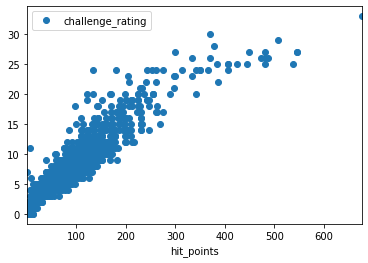

In [37]:
plot = mon1.plot(x='hit_points', y='challenge_rating', style='o')

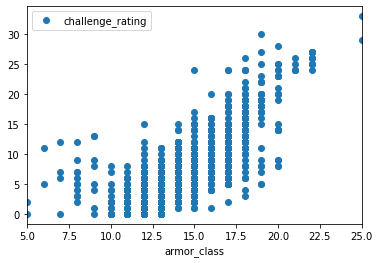

In [38]:
plot = mon1.plot(x='armor_class', y='challenge_rating', style='o')

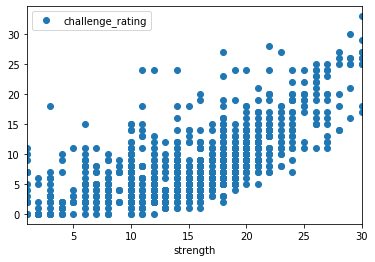

In [39]:
plot = mon1.plot(x='strength', y='challenge_rating', style='o')

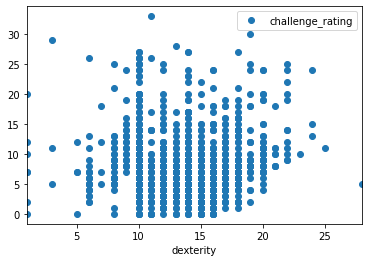

In [40]:
plot = mon1.plot(x='dexterity', y='challenge_rating', style='o')

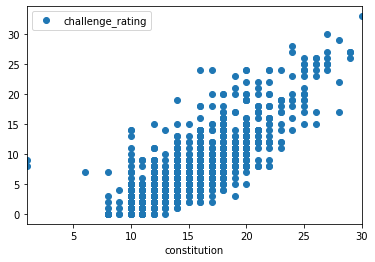

In [59]:
plot = mon1.plot(x='constitution', y='challenge_rating', style='o')

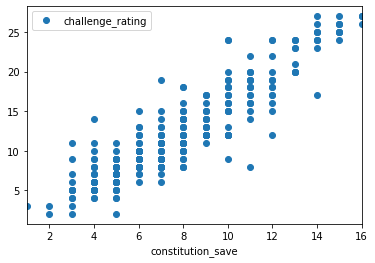

In [60]:
plot = mon1.plot(x='constitution_save', y='challenge_rating', style='o')

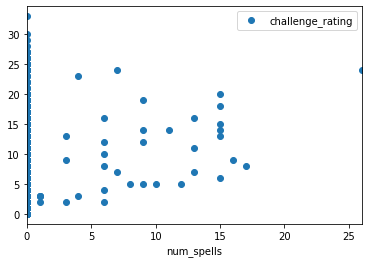

In [41]:
plot = mon1.plot(x='num_spells', y='challenge_rating', style='o')

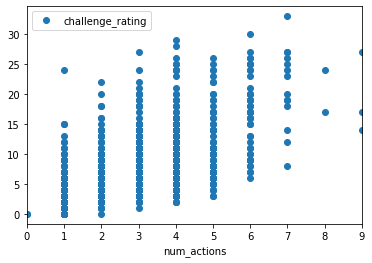

In [54]:
plot = mon1.plot(x='num_actions', y='challenge_rating', style='o')

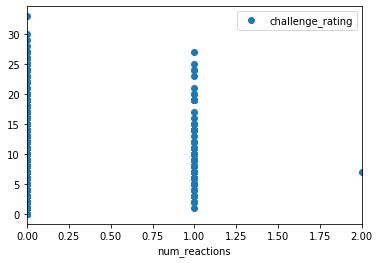

In [55]:
plot = mon1.plot(x='num_reactions', y='challenge_rating', style='o')

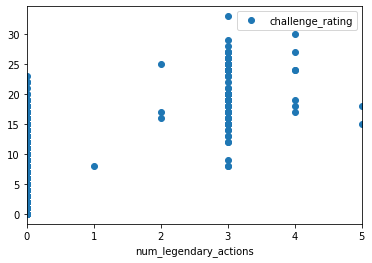

In [56]:
plot = mon1.plot(x='num_legendary_actions', y='challenge_rating', style='o')

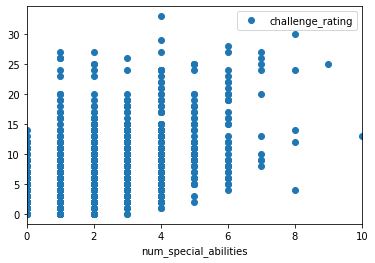

In [57]:
plot = mon1.plot(x='num_special_abilities', y='challenge_rating', style='o')